In [62]:

'''Description.
The essence of the project is to write a model that would predict the results of the state exam in mathematics
for every student in the school.And at an early stage I identified students at risk,
by determining the impact of living conditions of students aged 15 to 22 years 
on their performance in mathematics.

To determine the parameters of the future model, we will conduct reconnaissance data analysis.

We outline the main steps:
1) Let's look at the data.
2) Check the data for empty values.
3) Let's look at the distribution of the trait for numerical variables, eliminate outliers.
4) Let us estimate the number of unique values ​​for nominative variables.
5) If necessary, we transform the data.
6) Carry out a correlation analysis of quantitative variables.
7) Select non-correlating variables.
8) Analyze the nominative variables and eliminate those
which do not affect the predicted value (in our case, the variable score).
9) Select the data suitable for the further construction of the model.
10) If necessary, repeat the cycle until the model works as required.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

stud_math=pd.read_csv('stud_math.csv')
pd.set_option('display.max_columns',65)# render more columns
pd.set_option('display.max_rows', 400) # show more lines

In [3]:
stud_math.info()
stud_math.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [63]:
#rename columns

stud_math.columns=['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'score'],
      dtype='object')

In [64]:
#delete the column not indicated in the task

stud_math.drop('granular', axis=1, inplace = True)
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

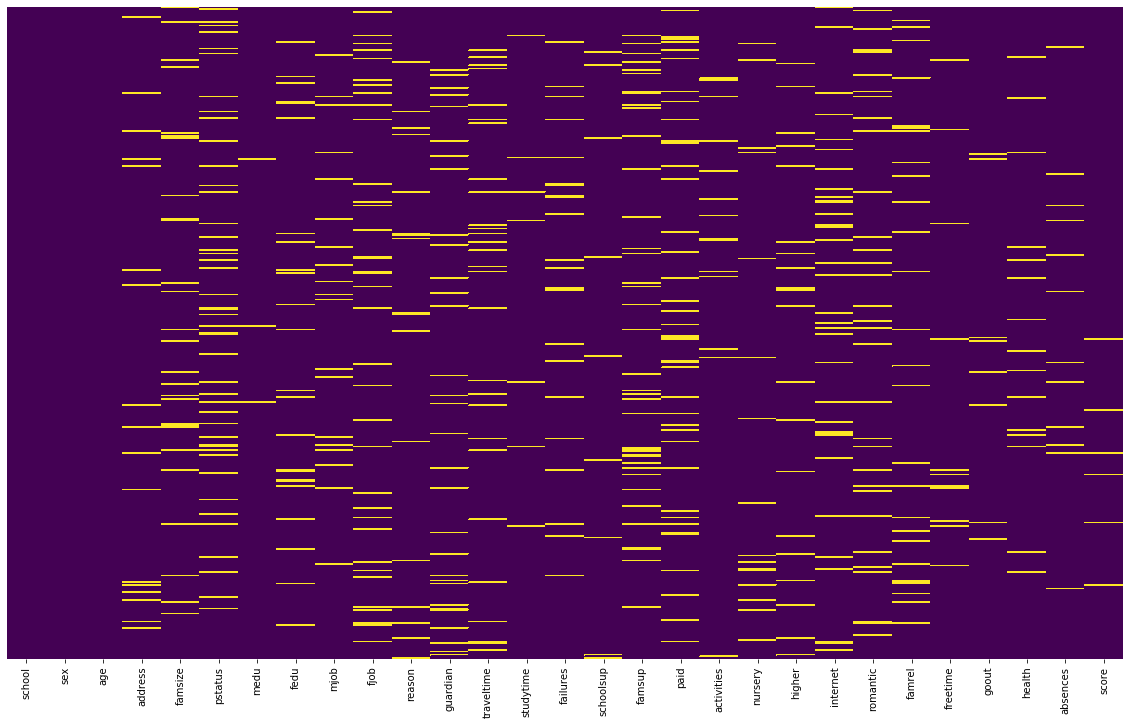

In [6]:
#for a visual assessment of the number of passes and their distribution, we make a heat map:

fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap=sns.heatmap(stud_math.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
#look at the information on dataset after manipulations
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [8]:
stud_math.isna().sum()  #Count the missing values

school         0
sex            0
age            0
address       17
famsize       27
pstatus       45
medu           3
fedu          24
mjob          19
fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

In [ ]:
'''let's see the number of unique values, empty lines,
and the amount of each of the accepted values  for each column,
display the distribution of values  for each column on the graphs'''

2
empty lines: 0


,school
GP,349
MS,46


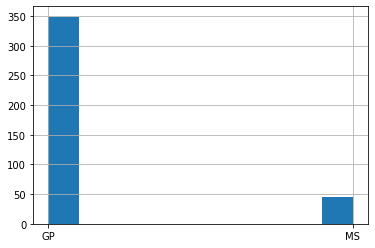

In [9]:
#school -the abbreviation of the school in which the student is studying

print(stud_math.school.nunique())

print("empty lines:",stud_math.school.isna().sum())
stud_math.school.hist()
pd.DataFrame(stud_math.school.value_counts())

2
empty lines: 0


,sex
F,208
M,187


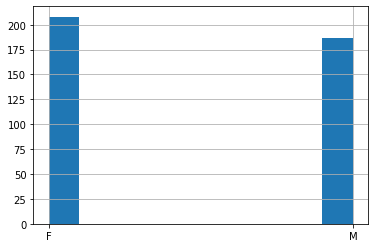

In [10]:
#sex — student gender ('F' - female, 'M' - male)

print(stud_math.sex.nunique())
print("empty lines:",stud_math.sex.isna().sum())

stud_math.sex.hist()
pd.DataFrame(stud_math.sex.value_counts())

8
empty lines: 0


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


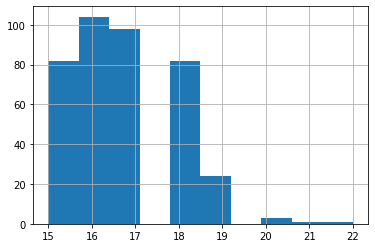

In [11]:
#age — student age (15 to 22)

print(stud_math.age.nunique())

print("empty lines:",stud_math.age.isna().sum())
stud_math.age.hist()
pd.DataFrame(stud_math.age.value_counts())

2
empty lines: 17


,address
U,295
R,83


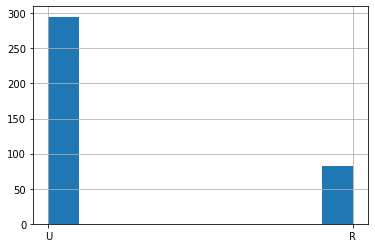

In [12]:
#address — student address type ('U' - city, 'R' - out of town)

print(stud_math.address.nunique())

print("empty lines:",stud_math.address.isna().sum())
stud_math.address.hist()
pd.DataFrame(stud_math.address.value_counts())

2
empty lines: 27


,famsize
GT3,261
LE3,107


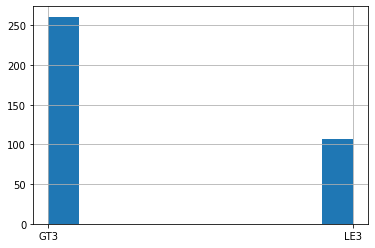

In [13]:
#famsize — family size ('LE3' <= 3, 'GT3'> 3)

print(stud_math.famsize.nunique())

print("empty lines:",stud_math.famsize.isna().sum())
stud_math.famsize.hist()
pd.DataFrame(stud_math.famsize.value_counts())

2
empty lines: 45


,pstatus
T,314
A,36


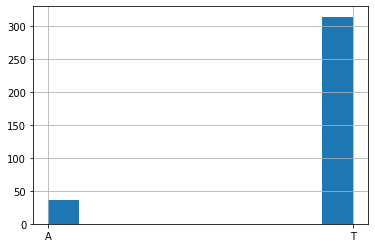

In [14]:
#pstatus — status of parental housing ('T' - live together 
                                              #'A' - live separately)

    
print(stud_math.pstatus.nunique())

stud_math.pstatus.hist()

print("empty lines:",stud_math.pstatus.isna().sum())
pd.DataFrame(stud_math.pstatus.value_counts())

пустые строки: 45


T    314
A     36
Name: pstatus, dtype: int64

5
empty lines: 3


,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


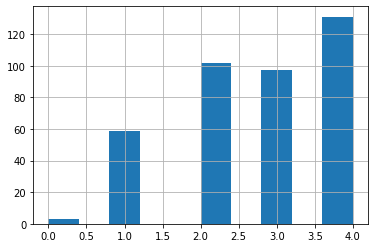

In [15]:
#medu — mother's education (0 - no, 
                           #1 - 4 classes, 
                           #2 - 5-9 grades, 
                           #3 - secondary special or 11 classes, 
                           #4 - higher)
print(stud_math.medu.nunique())

print("empty lines:",stud_math.medu.isna().sum())
stud_math.medu.hist()
pd.DataFrame(stud_math.medu.value_counts())

6
empty lines: 24


,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


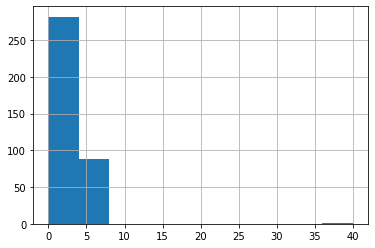

In [16]:
#fedu — father's education (0 - no, 
                           #1 - 4 classes, 
                           #2 - 5-9 grades, 
                           #3 - secondary special or 11 classes, 
                           #4 - higher)
print(stud_math.fedu.nunique())

print("empty lines:",stud_math.fedu.isna().sum())
stud_math.fedu.hist()
pd.DataFrame(stud_math.fedu.value_counts())


In [18]:
#fix a technical error

stud_math.fedu=stud_math.fedu.apply(lambda x: 4.0 if x==40.0 else x)

5
empty lines: 24


,fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


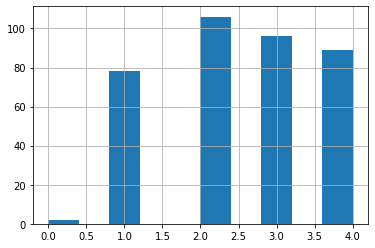

In [19]:
#fedu — father's education (0 - no, 
                           #1 - 4 classes, 
                           #2 - 5-9 grades, 
                           #3 - secondary special or 11 classes, 
                           #4 - higher)
print(stud_math.fedu.nunique())

print("empty lines:",stud_math.fedu.isna().sum())
stud_math.fedu.hist()
pd.DataFrame(stud_math.fedu.value_counts())

5
empty lines: 19


,mjob
other,133
services,98
at_home,58
teacher,55
health,32


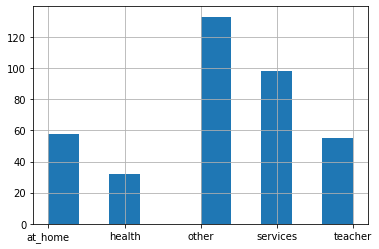

In [20]:
#mjob — mother's job ('teacher' , 
                      #'health' ,
                      #'services' , 
                      #'at_home' ,
                      #'other' )
print(stud_math.mjob.nunique())
print("empty lines:",stud_math.mjob.isna().sum())
stud_math.mjob.hist()
pd.DataFrame(stud_math.mjob.value_counts())

5
empty lines: 36


,fjob
other,197
services,102
teacher,29
at_home,16
health,15


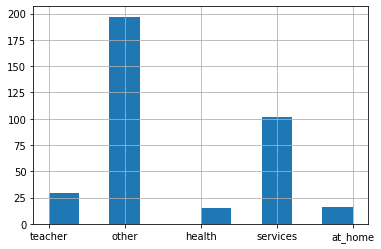

In [21]:
#fjob — father's work ('teacher',  
                      #'health' ,
                      #'services' , 
                      #'at_home' ,
                      #'other')
print(stud_math.fjob.nunique())
print("empty lines:",stud_math.fjob.isna().sum())
stud_math.fjob.hist()
pd.DataFrame(stud_math.fjob.value_counts())

4
empty lines: 17


,reason
course,137
home,104
reputation,103
other,34


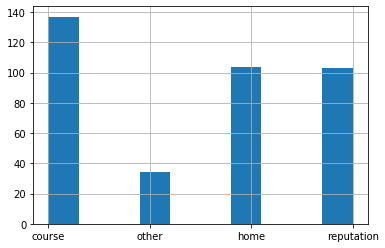

In [22]:
#reason — reason for choosing school ('home' , 
                               #'reputation' ,
                               #'course' ,
                               #'other' )
print(stud_math.reason.nunique())
print("empty lines:",stud_math.reason.isna().sum())
stud_math.reason.hist()
pd.DataFrame(stud_math.reason.value_counts())

3
empty lines: 31


,guardian
mother,250
father,86
other,28


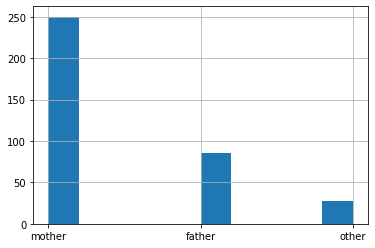

In [23]:
#guardian 
print(stud_math.guardian.nunique())
print("empty lines:",stud_math.guardian.isna().sum())
stud_math.guardian.hist()

pd.DataFrame(stud_math.guardian.value_counts())

4
empty lines: 28


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


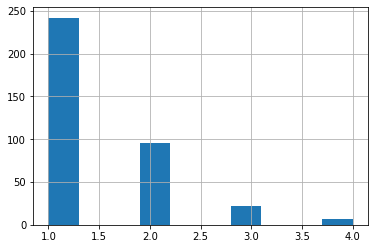

In [24]:
# traveltime 
print(stud_math.traveltime.nunique())            
#plt.plot(gos.traveltime)
print("empty lines:",stud_math.traveltime.isna().sum())
stud_math.traveltime.hist()
pd.DataFrame(stud_math.traveltime.value_counts())

4
empty lines: 7


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


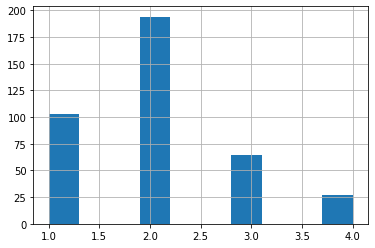

In [25]:
#studytime — study time besides school per week (1 - <2 часов,
                                                  #2 - 2-5 часов, 
                                                  #3 - 5-10 часов, 
                                                  #4 - >10 часов)
print(stud_math.studytime.nunique()) 
print("empty lines:",stud_math.studytime.isna().sum())
stud_math.studytime.hist()

pd.DataFrame(stud_math.studytime.value_counts()) 

4
empty lines: 22


,failures
0.0,293
1.0,49
2.0,16
3.0,15


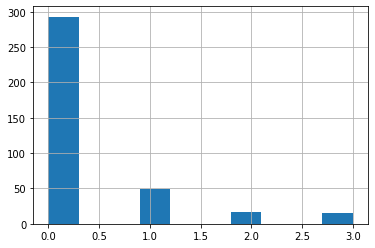

In [26]:
#failures — number of extracurricular failures(n, если 1<=n<3, иначе 0)
print(stud_math.failures.nunique())
print("empty lines:",stud_math.failures.isna().sum())
stud_math.failures.hist()

pd.DataFrame(stud_math.failures.value_counts())


2
empty lines: 9


,schoolsup
no,335
yes,51


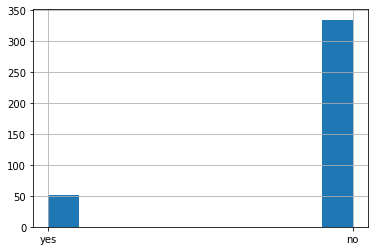

In [27]:
#schoolsup (yes или no)
print(stud_math.schoolsup.nunique())
print("empty lines:",stud_math.schoolsup.isna().sum())
stud_math.schoolsup.hist()

pd.DataFrame(stud_math.schoolsup.value_counts())

2
empty lines: 39


,famsup
yes,219
no,137


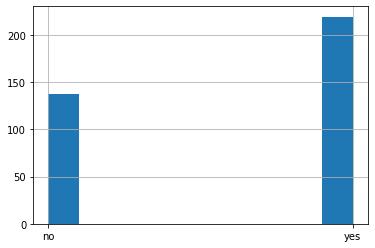

In [28]:
#famsup — family educational support (yes или no)
print(stud_math.famsup.nunique()) 
print("empty lines:",stud_math.famsup.isna().sum())
stud_math.famsup.hist()

pd.DataFrame(stud_math.famsup.value_counts())


2
empty lines: 40


,paid
no,200
yes,155


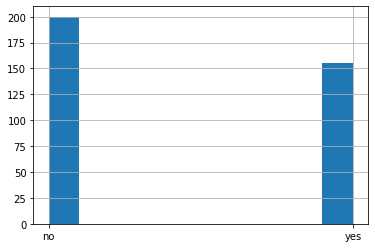

In [29]:
#paid — additional paid classes in mathematics (yes или no)
print(stud_math.paid.nunique()) 
print("empty lines:",stud_math.paid.isna().sum())
stud_math.paid.hist()

pd.DataFrame(stud_math.paid.value_counts())


2
empty lines: 14


,activities
yes,195
no,186


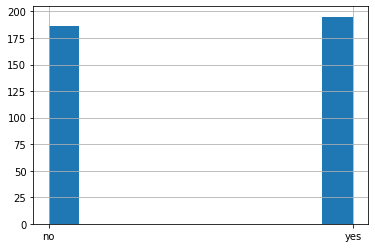

In [30]:
#activities —extracurricular activities (yes или no)
print(stud_math.activities.nunique())    
print("empty lines:",stud_math.activities.isna().sum())
stud_math.activities.hist()

pd.DataFrame(stud_math.activities.value_counts())

2
empty lines: 16


,nursery
yes,300
no,79


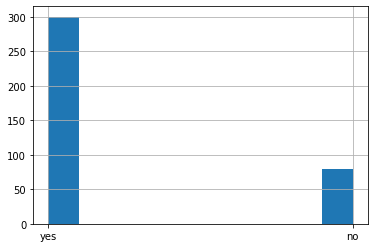

In [31]:
#nursery — visiting kindergarten (yes или no)
print(stud_math.nursery.nunique())  
print("empty lines:",stud_math.nursery.isna().sum())
stud_math.nursery.hist()

pd.DataFrame(stud_math.nursery.value_counts())

2
empty lines: 20


,higher
yes,356
no,19


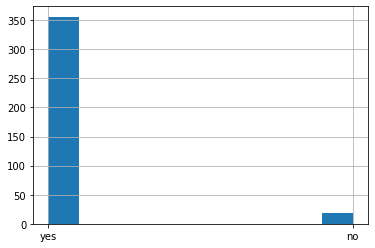

In [32]:
#higher — wants to graduate (yes или no)
print(stud_math.higher.nunique())  
print("empty lines:",stud_math.higher.isna().sum())
stud_math.higher.hist()

pd.DataFrame(stud_math.higher.value_counts())

2
empty lines: 34


,internet
yes,305
no,56


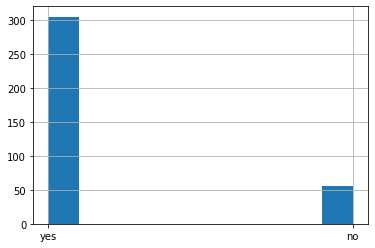

In [33]:
#internet — (yes или no)
print(stud_math.internet.nunique()) 
print("empty lines:",stud_math.internet.isna().sum())
stud_math.internet.hist()

pd.DataFrame(stud_math.internet.value_counts())

2
empty lines: 31


,romantic
no,240
yes,124


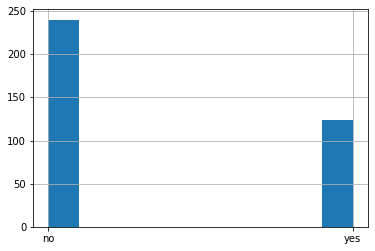

In [34]:
#romantic (yes или no)
print(stud_math.romantic.nunique())
print("empty lines:",stud_math.romantic.isna().sum())
stud_math.romantic.hist()

pd.DataFrame(stud_math.romantic.value_counts())

6
empty lines: 27


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


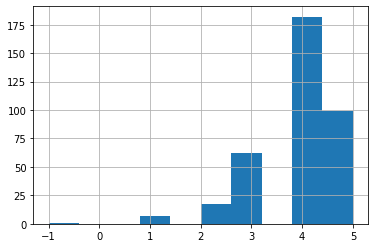

In [35]:
#famrel — family relationships (from 1 - very poor to 5 - very good)

print(stud_math.famrel.nunique()) 
print("empty lines:",stud_math.famrel.isna().sum())
stud_math.famrel.hist()

pd.DataFrame(stud_math.famrel.value_counts())

In [36]:
# eliminate technical error

stud_math.famrel=stud_math.famrel.apply(lambda x: abs(x) if x<0 else x)


5
empty lines: 27


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


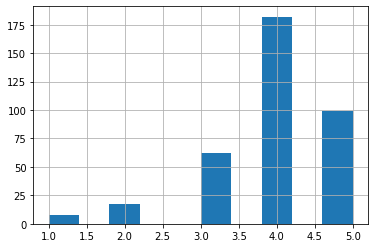

In [37]:
#famrel — family relationships (from 1 - very poor to 5 - very good))

print(stud_math.famrel.nunique()) 
print("empty lines:",stud_math.famrel.isna().sum())
stud_math.famrel.hist()

pd.DataFrame(stud_math.famrel.value_counts())

5
empty lines: 11


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


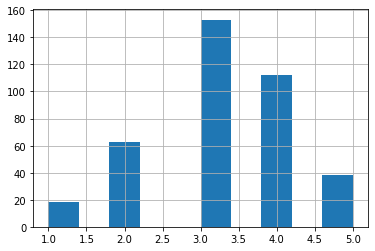

In [38]:
#freetime — free time after school (from 1 - very few to 5 - very much)
print(stud_math.freetime.nunique()) 
print("empty lines:",stud_math.freetime.isna().sum())
stud_math.freetime.hist()

pd.DataFrame(stud_math.freetime.value_counts())

5
empty lines: 8


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


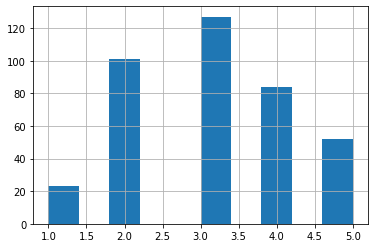

In [39]:
#goout — spending time with friends (from 1 - very few to 5 - very much)
print(stud_math.goout.nunique())  
print("empty lines:",stud_math.goout.isna().sum())
stud_math.goout.hist()

pd.DataFrame(stud_math.goout.value_counts())

5
empty lines: 15


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


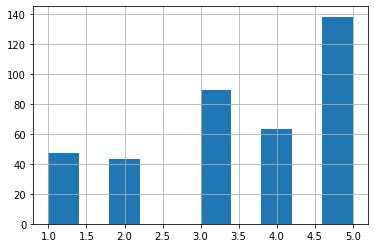

In [40]:
#health —current state of health(from 1 - very bad to 5 - very good)
print(stud_math.health.nunique()) 
print("empty lines:",stud_math.health.isna().sum())
stud_math.health.hist()

pd.DataFrame(stud_math.health.value_counts())

36
empty lines: 12


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


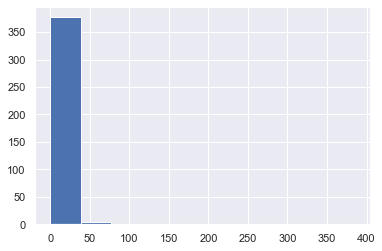

In [65]:
#absences —number of missed classes

print(stud_math.absences.nunique()) 
print("empty lines:",stud_math.absences.isna().sum())
stud_math.absences.hist()

pd.DataFrame(stud_math.absences.value_counts())

25th percentile:0.0, 75th percentile:8.0, IQR: 8.0, emission limits: [-12.0,20.0].


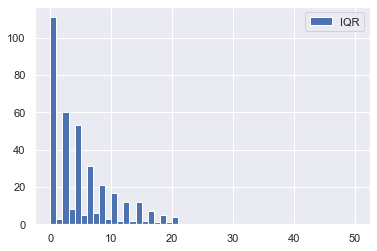

In [66]:
#define emissions

median=stud_math.absences.median()
perc25=stud_math.absences.quantile(0.25)
perc75=stud_math.absences.quantile(0.75)
IQR=perc75-perc25

print('25th percentile:{},'.format(perc25),'75th percentile:{},'.format(perc75),'IQR: {},'.format(IQR),'emission limits: [{f},{l}].'.format(f=perc25-1.5*IQR,l=perc75+1.5*IQR))

stud_math.absences.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 50, range = (0, 50),label = 'IQR')
plt.legend();


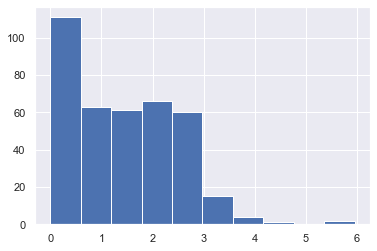

In [67]:
#significant difference, let's look through the logarithmization of the variable
stud_math.absences=stud_math.absences.apply(lambda w: np.log(w+1))
stud_math.absences.hist()


18
empty lines: 6


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


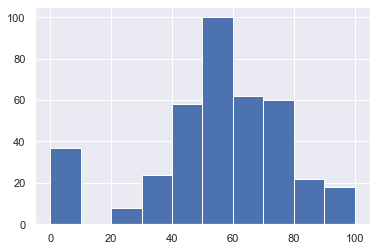

In [68]:
#score — math exam scores
print(stud_math.score.nunique()) 
print("empty lines:",stud_math.score.isna().sum())
stud_math.score.hist()
#plt.plot(gos.score)
pd.DataFrame(stud_math.score.value_counts())

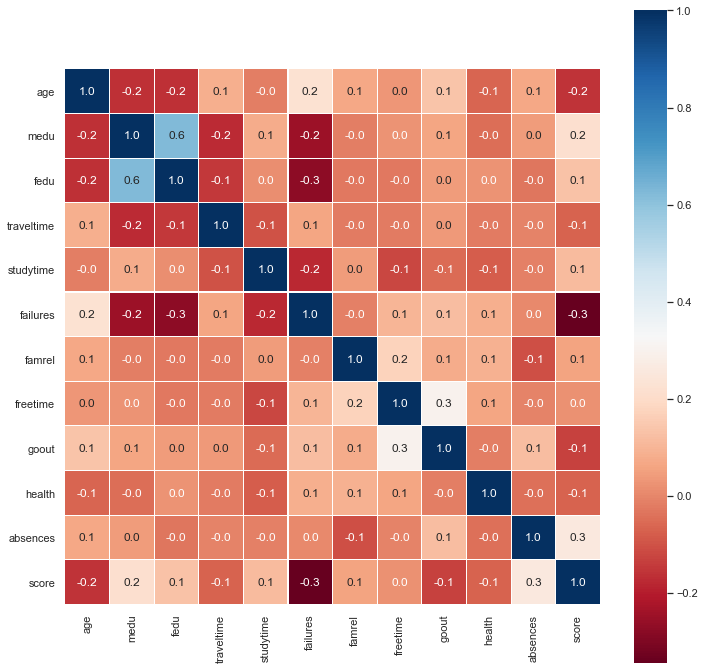

In [58]:
#for better clarity, we construct a correlation matrix

sns.set(font_scale=1)
plt.subplots(figsize=(12,12))
sns.heatmap(stud_math.corr(),square=True,
           annot=True,fmt=".1f",linewidths=0.1,cmap="RdBu")


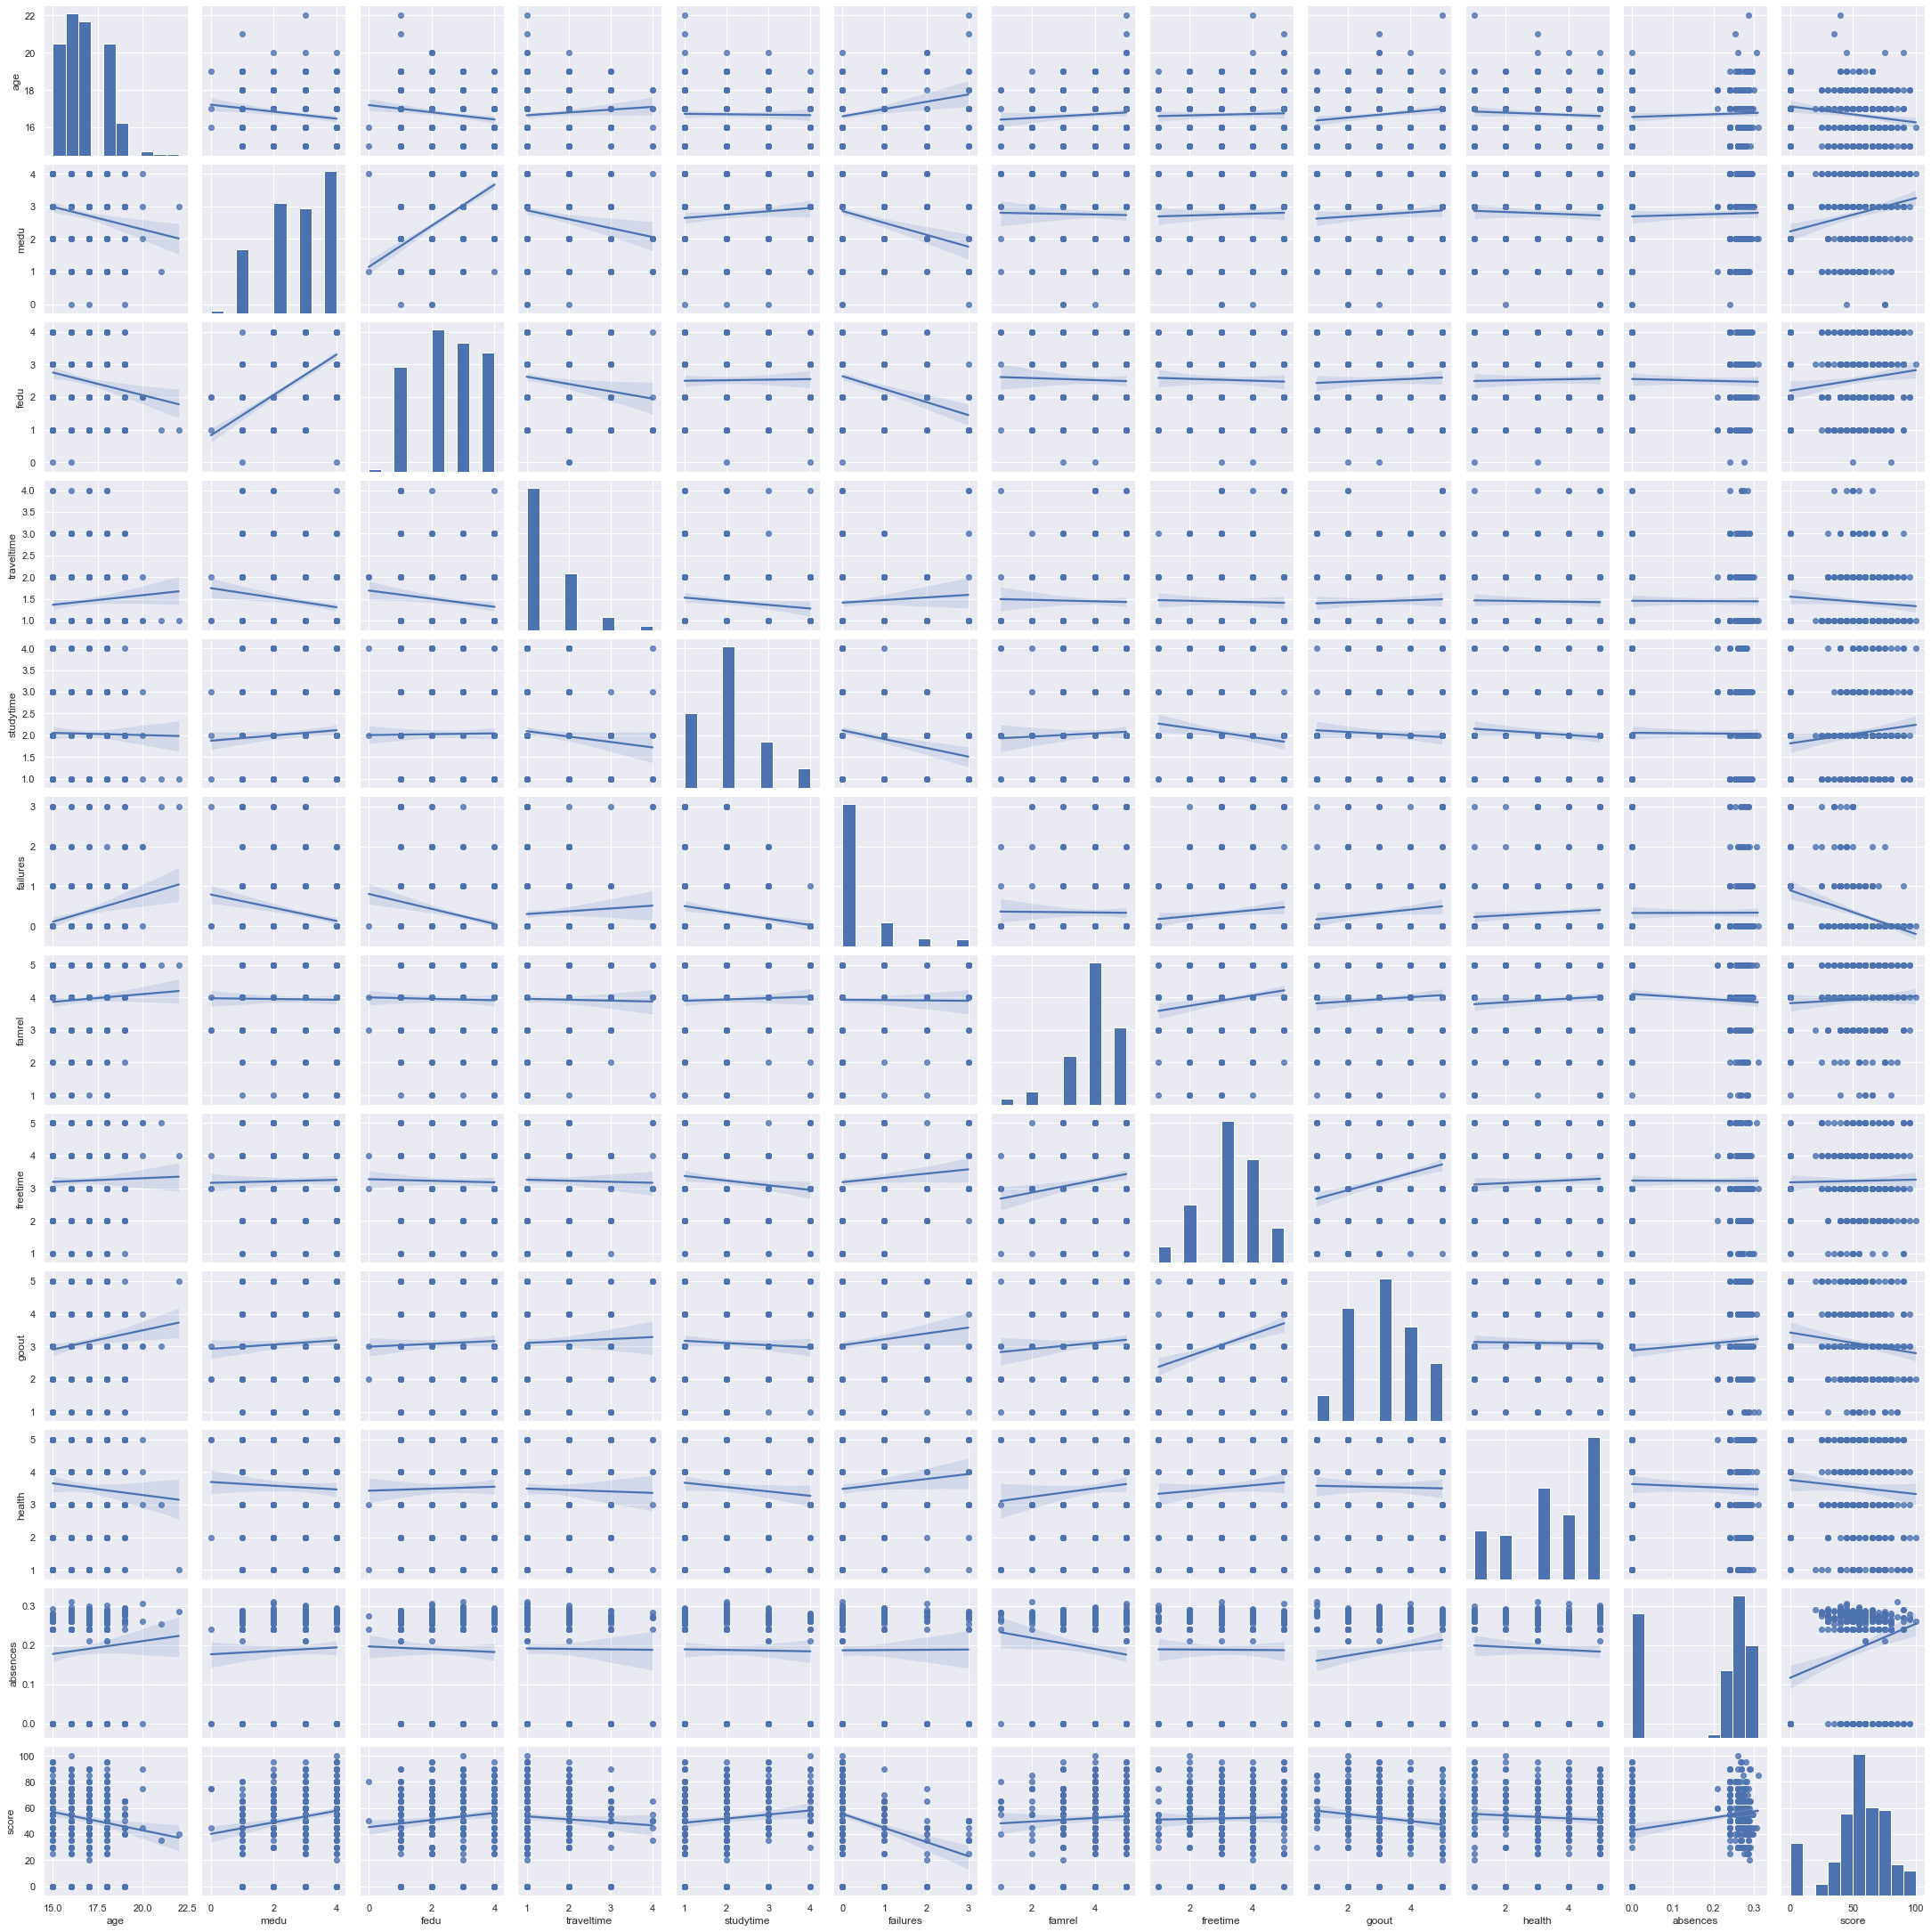

In [59]:
#carry out a correlation analysis of quantitative variables

sns.pairplot(stud_math, kind = 'reg')

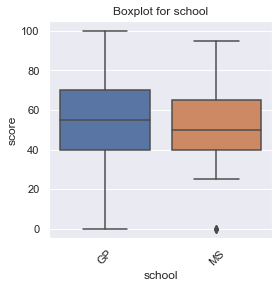

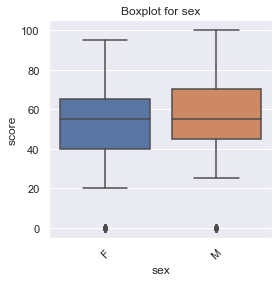

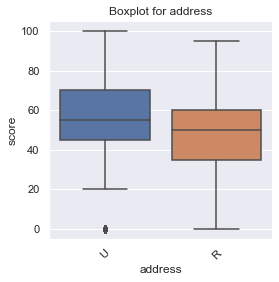

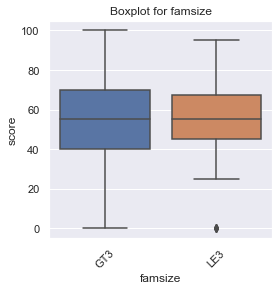

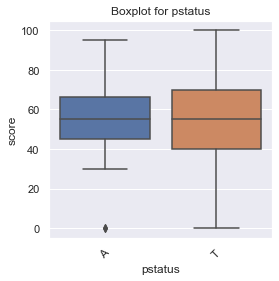

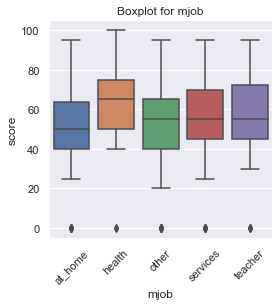

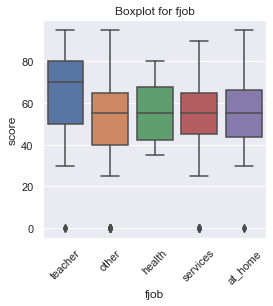

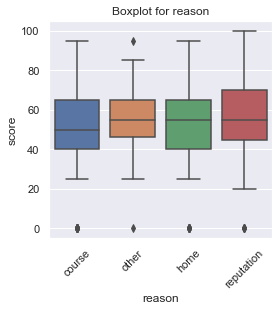

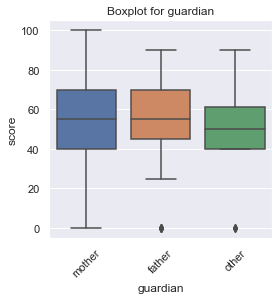

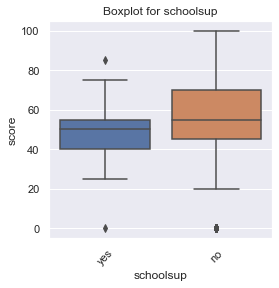

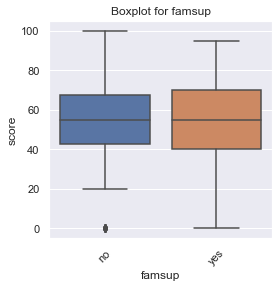

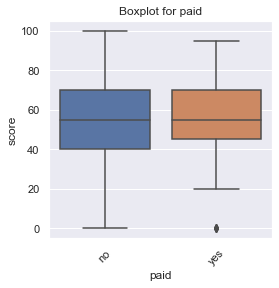

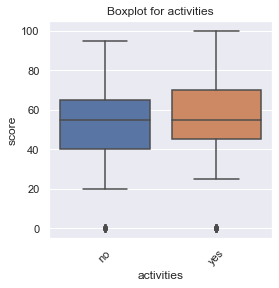

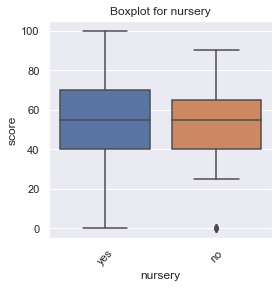

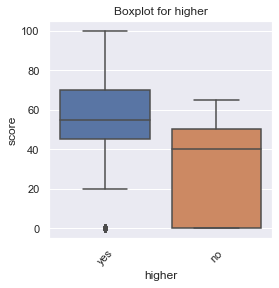

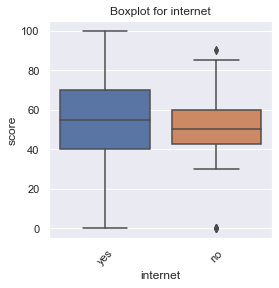

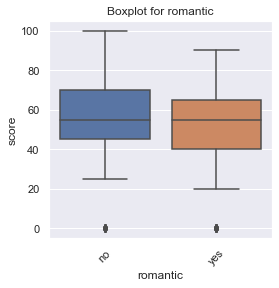

In [69]:
#analyze the nominative variables

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (4, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:20])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['school', 'sex', 'address','famsize','pstatus',
            'mjob', 'fjob', 'reason',
           'guardian','schoolsup','famsup','paid',
           'activities','nursery','higher','internet',
           'romantic']:get_boxplot(col)

In [70]:
'''Check if there is a statistical difference in the distribution of nominative features,
using the Student test'''

def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:20]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                       stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Bonferoni Amendment
            print('Statistically significant differences found for column', column)
            break
for col in ['school', 'sex', 'address','famsize','pstatus',
            'mjob', 'fjob', 'reason',
           'guardian','schoolsup','famsup','paid',
           'activities','nursery','higher','internet',
           'romantic']:get_stat_dif(col)


Statistically significant differences found for column mjob


C:\Users\IP\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\IP\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\IP\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [71]:
# delete columns in which, according to the results of previous analyzes, there is no information valuable to us

stud_math_stat = stud_math.loc[:, ['mjob','higher','score']]
stud_math_stat.head()

,mjob,higher,score
0,at_home,yes,30.0
1,at_home,yes,30.0
2,at_home,yes,50.0
3,health,yes,75.0
4,other,yes,50.0


In [72]:
stud_math_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mjob    376 non-null    object 
 1   higher  375 non-null    object 
 2   score   389 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.4+ KB


In [73]:
stud_math_stat.isna().sum()

mjob      19
higher    20
score      6
dtype: int64

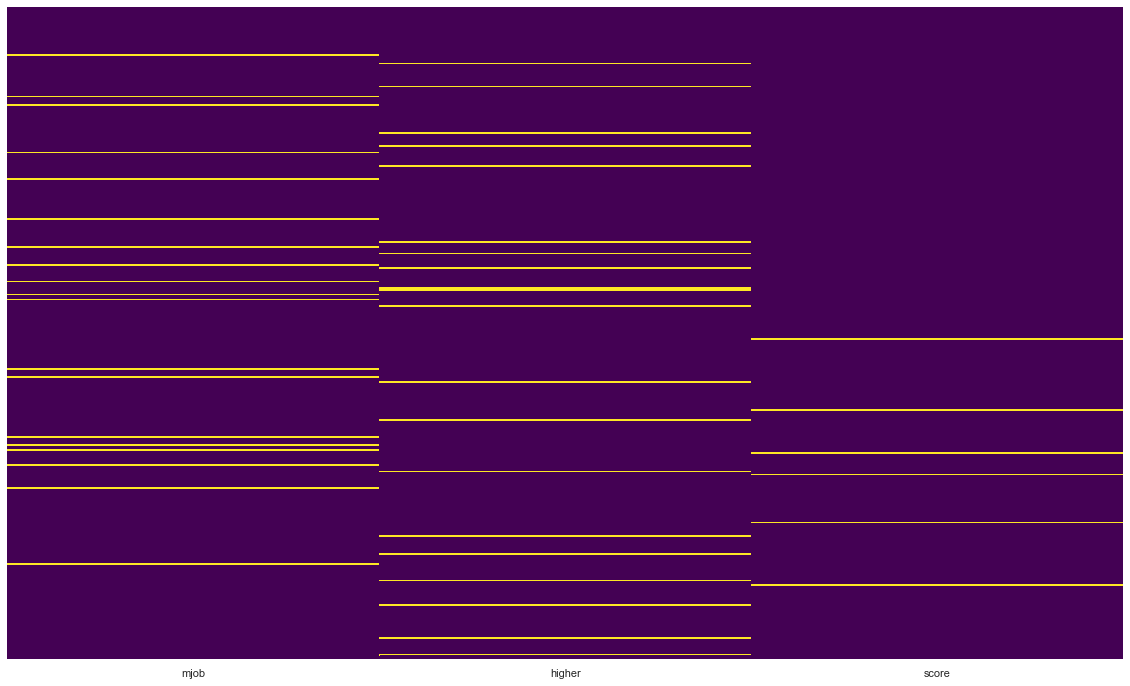

In [74]:
#Let us visually evaluate the number of passes and their distribution:

fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap=sns.heatmap(stud_math_stat.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [75]:
stud_math_stat=stud_math_stat.dropna() #delete the missing values
stud_math_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 394
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mjob    350 non-null    object 
 1   higher  350 non-null    object 
 2   score   350 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.9+ KB


In [76]:
# we transform categorical signs into dummy variables

stud_math_stat_dumm= pd.get_dummies(stud_math_stat, columns=['higher','mjob',])
stud_math_stat_dumm

,score,higher_no,higher_yes,mjob_at_home,mjob_health,mjob_other,mjob_services,mjob_teacher
0,30.0,0,1,1,0,0,0,0
1,30.0,0,1,1,0,0,0,0
2,50.0,0,1,1,0,0,0,0
3,75.0,0,1,0,1,0,0,0
4,50.0,0,1,0,0,1,0,0
5,75.0,0,1,0,0,0,1,0
6,55.0,0,1,0,0,1,0,0
7,30.0,0,1,0,0,1,0,0
8,95.0,0,1,0,0,0,1,0
9,75.0,0,1,0,0,1,0,0


In [77]:
# Define signs and target variable

Y=stud_math_stat_dumm.score.values # наш таргет
X=stud_math_stat_dumm.drop(['score'],axis=1)

#First, we need to divide the sample (that is, all of our objects) into a training and a test one. 
#load the necessary function for splitting:
from sklearn.model_selection import train_test_split

#Now, using this function, we get independent and dependent variables from the training and test samples. The size of the test sample is set to 0.2.
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=77)

from sklearn import preprocessing

scl=preprocessing.RobustScaler()

X_train_s=scl.fit_transform(X_train) 
X_test_s=scl.transform(X_test)


# Now train the model:
from sklearn.linear_model import LinearRegression
myM3=LinearRegression() #Denote that our model is linear regression
myM3.fit(X_train_s, Y_train) #train the model on training data

# Now we can try to predict the values ​​of the dependent variable for the test sample:
y_predict=myM3.predict(X_test_s)
print("y_predict:",y_predict)

Y_test_exp=np.exp(Y_test)-1
y_predict_exp=np.exp(y_predict)-1

from sklearn import metrics # load metrics

#calculate MAE:
MAE=metrics.mean_absolute_error(Y_test_exp,y_predict_exp)

print("MAE:",MAE)

#calculate MSE:
MSE=metrics.mean_squared_error(Y_test_exp,y_predict_exp)

print("MSE:",MSE)

#calculate coefficient of determination:
R_2=metrics.r2_score(Y_test_exp,y_predict_exp)

print("R_2:",R_2)



y_predict: [58.07692308 48.97440546 48.97440546 47.85909406 47.85909406 55.67045586
 53.74592155 55.67045586 47.85909406 55.67045586 53.74592155 55.67045586
 32.88346486 55.67045586 53.74592155 55.67045586 31.76815346 48.97440546
 55.67045586 55.67045586 55.67045586 48.97440546 53.74592155 32.88346486
 47.85909406 55.67045586 53.74592155 53.74592155 48.97440546 55.67045586
 48.97440546 31.76815346 48.97440546 48.97440546 53.74592155 48.97440546
 48.97440546 55.67045586 53.74592155 39.57951526 58.07692308 47.85909406
 31.76815346 58.07692308 47.85909406 47.85909406 55.67045586 55.67045586
 58.07692308 48.97440546 47.85909406 53.74592155 48.97440546 55.67045586
 55.67045586 55.67045586 48.97440546 47.85909406 47.85909406 53.74592155
 47.85909406 48.97440546 48.97440546 58.07692308 47.85909406 47.85909406
 53.74592155 58.07692308 55.67045586 48.97440546]
MAE: 3.892091393227768e+41
MSE: 1.0323757000603812e+85
R_2: -0.01489182903977948


In [ ]:
'''As a result of Data Intelligence (EDA),
assessment of the impact of living conditions of students aged 15 to 22 years on their performance
in mathematics, the following conclusions were obtained:

1)There are a lot of empty values ​​in the data.
2)Outliers found only in the missed activities column,
which allows us to conclude that the data is fairly clean.
3)The most important parameters that are proposed to be used later to build the model,
this mjob,'higher','score'.'''